### Chargepoint API Interface

In [98]:
import suds
from suds.client import Client
from suds.wsse import *
import pandas as pd

url = 'https://webservices.chargepoint.com/webservices/chargepoint/services/4.1'
wsdl = 'https://webservices.chargepoint.com/webservices/chargepoint/services/4.1?WSDL'
# API user and password
api_user = ''
api_pass = ''
 
    
    
def getChargingSessionData(stationID,url,wsdl,api_user,api_pass):
    ### INPUT stationID from Chargepoint account

    # create client and add security tokens in the soap header
    client = Client(url=wsdl, location=url)
    security = Security()
    token = UsernameToken(api_user, api_pass)
    security.tokens.append(token)
    client.set_options(wsse=security)
    
    #print(client)

    try:
        searchQuery = client.factory.create('sessionSearchdata')
        searchQuery.stationID = stationID
        #print (searchQuery)        
        response = client.service.getChargingSessionData(searchQuery)
        return response
## Print error message incase fails
    except suds.WebFault as detail:
        print (detail)

def getStations(url,wsdl,api_user,api_pass):

    # create client and add security tokens in the soap header
    client = Client(url=wsdl, location=url)
    security = Security()
    token = UsernameToken(api_user, api_pass)
    security.tokens.append(token)
    client.set_options(wsse=security)

    try:


        # getPublicStations() service method accepts a type of 'stationSearchRequestExtended'
        # so first create the type object
        #searchQuery = client.factory.create('stationSearchRequestExtended')
        # un-comment next line to see what parameters are supported
        #print (searchQuery)
        # all inputs are optional, but can be filled per API documentation

        # he is the actual call to the service
        response = client.service.getStations()
        #print response

        return response

# do whatever with the data
# print response
    except suds.WebFault as detail:
        print (detail)
        
        
def shedLoad(sgID,timeInterval,percentShed=False,allowedLoad=False,stationID=False,url,wsdl,api_user,api_pass):
    ### INPUT stationID from Chargepoint account
    '''
    sgID (REQUIRED) Custom Station Group identifier. 
    
    stationID (OPTIONAL) A unique station identifier used in ChargePoint database. The
    identifier never changes, even when the stations’s head
    assembly is swapped. Format : CPNID:StationIdentifier
    
    allowedLoad (OPTIONAL) Maximum allowed load expressed in kW. This value is an
    absolute maximum and is not relative to the power being
    dispensed by the station. If applied to a group, this parameter
    applies to each station, not the total power for the group. If
    this parameter is set, percentShed must be set to a null value.
    
    percentShed (OPTIONAL) Percentage of the power currently being dispensed by the
    station to shed. For example, if the station is currently
    dispensing 10kW, a value of 60% will lower the power being
    dispensed to 4kW. If applied to a group, this value applies to
    each station. If a station is not dispensing any power, the
    output will be set to zero until the shed state is cleared. If this
    parameter is set, allowedLoad must be set to a null value.
    
    timeInterval (REQUIRED) Time interval in minutes. A value of 0 indicates that there is no
    specified duration for which the power will be shed.'''


    # create client and add security tokens in the soap header
    client = Client(url=wsdl, location=url)
    security = Security()
    token = UsernameToken(api_user, api_pass)
    security.tokens.append(token)
    client.set_options(wsse=security)
    
    #print(client)

    try:
        # getPublicStations() service method accepts a type of 'stationSearchdata'
        # so first create a stationSearchRequest type object
        sgData=dict.fromkeys(['sgID','stationID'])
        sgData['sgID'] = str(sgID)
        if stationID:
            sgData['stationID']=stationID
        
        sgLoadData=dict.fromkeys(['allowedLoad','percentShed'])
        if allowedLoad:
            sgLoadData['allowedLoad'] = allowedLoad
        if percentShed:
            sgLoadData['percentShed'] = percentShed            
            
        # actual call to the service
        print(sgData)
        print(sgLoadData)
        response = client.service.shedLoad(sgData,sgLoadData,timeInterval)
        return response
    
## Print error message incase fails
    except suds.WebFault as detail:
        print (detail)
        
def getLoad(sgID,stationID=False,url,wsdl,api_user,api_pass):


    # create client and add security tokens in the soap header
    client = Client(url=wsdl, location=url)
    security = Security()
    token = UsernameToken(api_user, api_pass)
    security.tokens.append(token)
    client.set_options(wsse=security)

    try:
        # so first create the type object
        # the actual call to the service
        response = client.service.getLoad(sgID,stationID)

        return response

# do whatever with the data
# print response
    except suds.WebFault as detail:
        print (detail)        

def get15minChargingSessionData(sessionID,url,wsdl,api_user,api_pass):

    # create client and add security tokens in the soap header
    client = Client(url=wsdl, location=url)
    security = Security()
    token = UsernameToken(api_user, api_pass)
    security.tokens.append(token)
    client.set_options(wsse=security)

    try:

        response = client.service.get15minChargingSessionData(int(sessionID))

        return response
    except suds.WebFault as detail:
        print (detail)        
        
def getReservableStations(url,wsdl,api_user,api_pass):

    # create client and add security tokens in the soap header
    client = Client(url=wsdl, location=url)
    security = Security()
    token = UsernameToken(api_user, api_pass)
    security.tokens.append(token)
    client.set_options(wsse=security)

    try:

        searchQuery = client.factory.create('reservableStationSearchData')

        # so first create the type object
        # the actual call to the service
        response = client.service.getReservableStations(searchQuery)

        return response

# do whatever with the data
# print response
    except suds.WebFault as detail:
        print (detail)        
                
        
        
        

#if __name__=="__main__":
    #main()

In [99]:
### PRINT CLIENT TO SEE METHODS & TYPES
client = Client(url=wsdl, location=url)
security = Security()
token = UsernameToken(api_user, api_pass)
security.tokens.append(token)
client.set_options(wsse=security)
print(client)


Suds ( https://fedorahosted.org/suds/ )  version: 0.6

Service ( chargepointservices ) tns="urn:dictionary:com.chargepoint.webservices"
   Prefixes (1)
      ns0 = "urn:dictionary:com.chargepoint.webservices"
   Ports (1):
      (chargepointservicesSOAP)
         Methods (28):
            cancelReservation(xs:string accountHandle, xs:string serialNumber, xs:string reservationHandle)
            cancelReservationHold(xs:string accountHandle, xs:string serialNumber, xs:string reservationHandle)
            clearAlarms(xs:string orgID, xs:string organizationName, xs:string stationID, xs:string stationName, xs:int sgID, xs:string sgName, xs:dateTime startTime, xs:dateTime endTime, xs:int portNumber, xs:string alarmType, xs:string clearReason)
            clearShedState(xs:int sgID, xs:string stationID)
            confirmReservation(xs:string accountHandle, xs:string serialNumber, xs:string stationID, xs:dateTime startTime, xs:int Duration, xs:int portNumber)
            get15minChargingS

In [60]:
response=getStations()
#print(response)
#getPublicStations(37.440970, -122.143254)
ct=0
for elem in response.stationData:
    if ct==0:
        stations=pd.DataFrame.from_records([dict(elem)], index='stationID')
    else:
        stations=stations.append(pd.DataFrame.from_records([dict(elem)], index='stationID'))
    ct=ct+1

In [9]:
response

(reply){
   responseCode = "100"
   responseText = "API input request executed successfully."
   stationData[] = 
      (stationDataExtended){
         stationID = "1:44483"
         stationManufacturer = "ChargePoint"
         stationModel = "CT2000-HD-GW1-CCR"
         stationMacAddr = "000D:6F00:04FE:C287"
         stationSerialNum = "113610008282"
         Address = "2575 Sand Hill Rd "
         City = "Menlo Park"
         State = "California"
         Country = "United States"
         postalCode = "94025"
         Port[] = 
            (portData){
               portNumber = 1
               stationName = "B&WLAB; / 001"
               Geo = 
                  (geoData){
                     Lat = "37.417317927867835"
                     Long = "-122.207619323587040"
                  }
               Description = "Experimental use only - CHARGING NOT GUARANTEED"
               Reservable = 0
               Status = "INUSE"
               Level = "L2"
               Connector 

In [11]:
sgIDs=[elem for elem in stations['sgID']]
sgIDs

[64669, 58699, 38623, 39557, 39915, 40119, 40815, 43819, 45487, 45677, 49799, 50705, 50811, 51591, 51849, 52427, 52429, 53355, 54463, 57551, 66175]

In [6]:
response=getLoad(64669)
print(response)

(reply){
   responseCode = "172"
   responseText = "Please provide all the mandatory fields to make this call."
 }


In [61]:
response=getChargingSessionData('1:44483')


(sessionSearchdata){
   stationID = "1:44483"
   sessionID = None
   stationName = None
   Address = None
   City = None
   State = None
   Country = None
   postalCode = None
   Proximity = None
   proximityUnit = None
   fromTimeStamp = None
   toTimeStamp = None
   startRecord = None
   Geo = 
      (geoData){
         Lat = None
         Long = None
      }
 }


In [14]:
ct=0
for elem in response.ChargingSessionsData:
    if ct==0:
        df=pd.DataFrame.from_records([dict(elem)], index='sessionID')
    else:
        df=df.append(pd.DataFrame.from_records([dict(elem)], index='sessionID'))
    ct=ct+1

In [15]:
df

,Address,City,Country,Energy,State,endTime,portNumber,postalCode,recordNumber,startTime,stationID,stationName
sessionID,,,,,,,,,,,,
45231143,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,3.060794,California,2016-06-08 22:39:43+00:00,1,94025,1,2016-06-08 21:42:49+00:00,1:44483,B&WLAB; / 001
45264395,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,6.755262,California,2016-06-09 19:40:29+00:00,1,94025,2,2016-06-09 15:29:35+00:00,1:44483,B&WLAB; / 001
46498991,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,6.776164,California,2016-07-05 19:47:50+00:00,1,94025,3,2016-07-05 14:30:59+00:00,1:44483,B&WLAB; / 001
46528175,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,1.905402,California,2016-07-06 00:06:56+00:00,1,94025,4,2016-07-05 22:09:15+00:00,1:44483,B&WLAB; / 001
46551487,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,6.849510,California,2016-07-06 16:53:26+00:00,1,94025,5,2016-07-06 14:04:32+00:00,1:44483,B&WLAB; / 001
46579519,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,1.740896,California,2016-07-07 01:09:22+00:00,1,94025,6,2016-07-06 20:02:30+00:00,1:44483,B&WLAB; / 001
46701657,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,6.911061,California,2016-07-08 23:12:36+00:00,1,94025,7,2016-07-08 20:46:35+00:00,1:44483,B&WLAB; / 001
46804799,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,6.955988,California,2016-07-12 01:45:47+00:00,1,94025,8,2016-07-11 17:40:27+00:00,1:44483,B&WLAB; / 001
46913345,"2575 Sand Hill Rd, Menlo Park, California, 940...",Menlo Park,United States,5.107395,California,2016-07-13 16:37:35+00:00,1,94025,9,2016-07-13 15:04:49+00:00,1:44483,B&WLAB; / 001


In [14]:
import seaborn as sns
from matplotlib import pylab as plt
%matplotlib inline

(array([  2.,   3.,   0.,   2.,   2.,   2.,   2.,   1.,   1.,  18.]),
 array([ 0.921693 ,  1.5369681,  2.1522432,  2.7675183,  3.3827934,
         3.9980685,  4.6133436,  5.2286187,  5.8438938,  6.4591689,
         7.074444 ]),
 <a list of 10 Patch objects>)

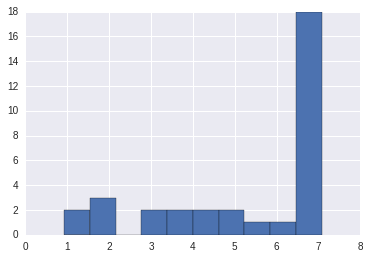

In [15]:
plt.hist(df['Energy'])

In [18]:
response=get15minChargingSessionData(45231143)
print(response)

(reply){
   responseCode = "100"
   responseText = "API input request executed successfully."
   sessionID = 45231143
   stationID = "1:44483"
   portNumber = 1
   fifteenminData[] = 
      (oChargingSessionsData){
         stationTime = 2016-06-08 21:42:49+00:00
         energyConsumed = 0.086997
         peakPower = 3.2748
         rollingPowerAvg = 2.3908
      },
      (oChargingSessionsData){
         stationTime = 2016-06-08 21:45:00+00:00
         energyConsumed = 0.9016
         peakPower = 3.3107
         rollingPowerAvg = 3.2584
      },
      (oChargingSessionsData){
         stationTime = 2016-06-08 22:00:00+00:00
         energyConsumed = 1.720013
         peakPower = 3.3001
         rollingPowerAvg = 3.2737
      },
      (oChargingSessionsData){
         stationTime = 2016-06-08 22:15:00+00:00
         energyConsumed = 2.535713
         peakPower = 3.2824
         rollingPowerAvg = 3.2628
      },
      (oChargingSessionsData){
         stationTime = 2016-06-08 22:30:00+

In [6]:
response=getReservableStations()
print(response)

(reply){
   responseCode = "100"
   responseText = "API input request executed successfully."
   stationData[] = 
      (stationData){
         stationID = "1:143529"
         stationManufacturer = "ChargePoint"
         stationModel = "CT4020-HD-GW"
         Address = "Hearth Pl "
         City = "Santa Clara"
         State = "California"
         Country = "United States"
         postalCode = "95051"
         Port[] = 
            (portData){
               portNumber = 1
               stationName = "HEARTH SOUTH / HEARTH SOUTH"
               Geo = 
                  (geoData){
                     Lat = "37.340748832972665"
                     Long = "-121.978569250401280"
                  }
               Description = "-"
               Reservable = 1
               Level = "L2"
               Connector = "J1772"
               Voltage = "240"
               Current = "30"
               Power = "6.600"
               estimatedCost = 0.0
            },
            (portData)

In [7]:
get15minChargingSessionData()

(reply){
   responseCode = "101"
   responseText = "You are not authorized to access this API call, because your ChargePoint Network Service Plan does not let you run this call. Please contact ChargePoint Customer Support to upgrade your Service Plan."
 }

In [ ]:
response = client.service.getChargingSessionData(searchQuery)